# **02-1 훈련 세트와 테스트 세트**
## **지도 학습과 비지도 학습**
* **지도학습(Supervised Learning)**
  * 지도학습은 훈련을 위한 데이터(**입력,input**)와 정답(**타깃, target**)를 전달하여 모델을 훈련한 다음 새로운 데이터를 예측하는 데 활용하는 것  
    e.g. K-최근접 이웃 알고리즘
    * **훈련 세트**: 모델을 훈련할 때 사용하는 데이터로, 보통 훈련 세트가 클수록 좋다. 따라서 테스트 데이터 세트를 제외한 모든 데이터를 사용
    * **테스트 세트**: 전체 데이터에서 20~30%를 테스트 세트로 사용하는 경우가 많다. 전체 데이터가 아주 크다면 1%만 덜어내도 충분할 수 있다.
  * 입력에는 데이터를 구분하기 위한 **특성(feature)**이 포함되며, 하나의 데이터를 **샘플(Sample)**이라고 부른다.  
  e.g. 생선데이터의 한 샘플에는 길이와 무게 2개의 특성이 포함돼있다.  

<center>

||훈련데이터||
|---:|---|:---:|
|**입력**||**타깃**|
|길이 특성| 무게 특성|
|[[25.4, | 242.0],|[1,|
|... | ...|...|
|[15.0 | 19.9]]| 0]|

</center>

* **비지도학습(Unsupervised Learning)**
  * 타깃 없이 입력데이터만을 가지고 학습 --> 입력 데이터만 있을 때에는 비지도 학습 알고리즘을 사용함
  * 정답을 맞힐 수 없으나, 데이터를 파악하거나 변형하는 데 도움을 줌
* **강화학습(Reinforcement Learning)**
  * 타깃이 아니라 알고리즘이 행동한 결과로 얻은 보상을 사용해 학습

## **훈련세트와 테스트세트**
* 연습 문제와 시험 문제가 달라야 학생의 능력을 올바르게 평가할 수 있듯이, 머신러닝 알고리즘의 성능을 제대로 평가하려면 훈련데이터(**훈련세트**)와 평가에 사용되는 데이터(**테스트세트**)가 달라야 함
  * 테스트세트를 준비하는 방법
    * 평가를 위해 또 다른 데이터를 준비한다.
    * **이미 준비된 데이터 중에서 일부를 떼어 내 활용한다. (이 경우가 일반적)**
  * **샘플**: 하나의 데이터를 샘플이라고 하며, 여기서는 전체 49개의 생선 샘플이 있고, 사용하는 특성은 길이와 무게 2개이다.

In [ ]:
# 1장에서처럼 도미와 빙어의 데이터를 합쳐 하나의 파이썬 리스트로 준비한다.
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# 입력데이터와 타깃데이터를 만든다.
# 이때 fish_data 전체 데이터에는 49개의 샘플이 포함된다.
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
### 만든 입력데이터의 처음 35개 샘플만 훈련세트로 사용하기
## 슬라이싱 연산으로 0~34까지 처음 35개의 샘플을 훈련 세트로 선택, 인덱스 35~48까지 14개의 샘플을 테스트 세트로 선택하기
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# 테스트 세트의 입력값으로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트의 타깃으로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

In [ ]:
# 모델 훈련하기
kn.fit(train_input, train_target)
# 모델의 정확도 평가
kn.score(test_input, test_target)

0.0

## **샘플링 편향**
* 정확도가 박살나지 않기 위해서는 훈련 세트와 테스트 세트를 나누기 전 두 가지 데이터가 골고루 섞이게 만들어야 함
  * 즉, 훈련 세트와 테스트 세트 모두 도미와 빙어 데이터를 포함하고 있어야 함

* **샘플링 편향(Sampling Bias)**: 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않아서 샘플링이 한쪽으로 치우친 현상

## **넘파이**
* 파이썬의 대표적인 배열(array) 라이브러리로 많은 파이썬 과학 라이브러리에서 사용하는 표준 데이터
* 파이썬 리스트로 고차원 리스트를 표현하려면 매우 번거로움 --> 넘파이는 고차원의 배열을 쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공
  * 1차월 배열: 선
  * 2차원 배열: 면
  * 3차원 배열: 3차원 공간
* array는 왼쪽 위에서부터 배열이 시작됨
* 사이킷런 모델의 입력과 출력은 모두 넘파이 배열
* 데이터가 아주 큰 경우 파이썬 리스트로 작업하는 것은 비효율적이므로, 데이터가 클수록 넘파이 배열을 사용하는 것이 좋음

In [ ]:
## 생선 데이터를 2차원 넘파이 배열로 변환하기
# 넘파이 라이브러리 임포트
import numpy as np

In [ ]:
# array() 함수를 이용하여 파이썬 리스트를 넘파이 배열로 바꾸기
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
# 49개의 행과 2개의 열이 출력됨
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
# shape 속성으로 배열의 크기(샘플 수, 특성 수) 알아내기
print(input_arr.shape)

(49, 2)


> `seed()`: 난수를 생성하기 위한 정수 초깃값을 지정한다. 초기값이 같으면 동일한 난수를 추출할 수 있으며, 따라서 랜덤 함수의 결과를 동일하게 재현하고 싶을 때 사용합니다.

In [ ]:
## 배열에서 랜덤하게 샘플을 선택하기
# 인덱스를 이용해 input_arr와 target_arr에서 같은 위치는 함께 선택되어 타깃이 샘플과 함깨 이동하게 한다.
# 인덱스를 섞은 다음 이 인덱스를 이용해 input_arr와 target_arr에서 샘플을 선택하면 무작위로 훈련 세트를 나눌 수 있다.
np.random.seed(42) # 코드를 돌릴 때마다 동일한 결과가 나올 수 있도록 시드 설정하기

> `arange(start = 0, end, step = 1)`: 일정한 간격의 정수를 0 ~ 종료 숫자까지 실수 배열을 만든다.

In [ ]:
# 넘파이의 arange() 함수를 사용하여 0 ~ 48의 1씩 증가하는 배열을 만든다.
index = np.arange(49)

> `shuffle()`: 주어진 배열을 랜덤하게 섞는다. 다차원 배열일 경우 첫 번째 축(행)에 대해서만 섞는다.

In [ ]:
# 넘파이 random 패키지 아래의 shuffle() 함수는 주어진 배열을 무작위로 섞는다.
np.random.shuffle(index)

In [ ]:
# 만들어진 index 출력
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
# 넘파이의 배열 인덱싱(array indexing)을 이용해 한 번에 여러개의 인덱스 선택하기
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [ ]:
# 앞서 만든 index 배열의 처음 35개를 input_arr와 target_arr에 전달하여 랜덤한 35개 샘플을 포함한 훈련 세트를 만든다.
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [ ]:
# index의 첫번째 원소인 13이 input_arr[13]의 인덱스로 들어갔으므로, input_arr의 열네번째 원소가 출력된다.
print(input_arr[13],train_input[0])

[ 32. 340.] [ 32. 340.]


In [ ]:
# 나머지 14개를 테스트 세트로 만든다.
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]
np.shape(test_input)

(14, 2)

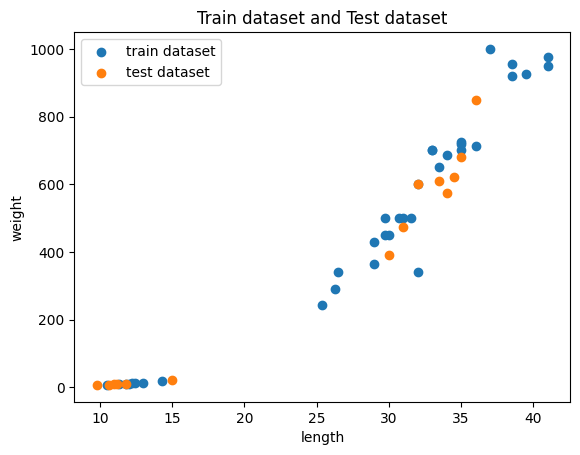

In [ ]:
# 훈련 세트와 테스트 세트에 도미와 빙어가 잘 섞여 있는지 산점도로 확인해본다.
import matplotlib.pyplot as plt
plt.scatter([x[0] for x in train_input], [x[1] for x in train_input], label = "train dataset")
plt.scatter([x[0] for x in test_input], [x[1] for x in test_input], label = "test dataset")
plt.xlabel("length")
plt.ylabel("weight")
plt.title("Train dataset and Test dataset")
plt.legend()
plt.show()

## **두 번째 머신러닝 프로그램**
* 훈련 세트와 테스트 데이터 세트로 k-최근접 이웃 모델 훈련시키기
  * `fit()` 메소드는 실행할 때마다 KNeighborsClassifier 클래스 객체는 이전에 학습한 모든 것을 잃어버리므로 그전 모델을 그대로 놔두고 싶다면 새로운 객체를 생성해야 함

In [ ]:
# 여기서는 그냥 그전 모델을 사용하자
kn = kn.fit(train_input, train_target)

In [ ]:
kn.score(test_input, test_target)

1.0

In [ ]:
# predict() 메소드로 테스트 세트의 예측 결과와 실제 타깃을 비교해보기
# kn의 예측결과 (넘파이 배열로 반환한다)
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
# 실제 타깃
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# **02-2 데이터 전처리**
* 올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과저을 거칩니다. 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일을 변환하는 방법을 배웁니다.

* **데이터 전처리**: 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계를 말합니다. 때로는 데이터 전처리에 많은 시간이 소모되기도 합니다.

### **넘파이로 데이터 준비하기**
 > `column_stack()`: 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결합니다. 연결할 리스트는 파이썬 튜플로 전달합니다.

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# column_stack() 사용해보기
np.column_stack(([1, 2, 3], [4, 5, 6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))

In [ ]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


> `np.ones()`, `np.zeros()`: 각각 원하는 개수의 1과 0을 채운 배열을 만들어 줍니다.  
> `np.concatenate()`: 첫 번째 차원(행)을 따라 배열을 연결해줍니다.

In [ ]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [ ]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## **사이킷런으로 훈련 세트와 테스트 세트 나누기**
> `train_test_split()`: 사이킷런의 model_selection 모듈 아래에 있음
* 나누고 싶은 리스트나 배열을 원하는 만큼 전달하면 됨

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# fish_data와 fish_target을 train set과 test set으로 나누기
# random_state = 초기값 설정
# default로 25%를 test set로 떼어낸다.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [ ]:
# input 데이터는 2개의 열이 있는 2차원 배열
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [ ]:
# target 데이터는 1차원 배열
print(train_target.shape, test_target.shape)

(36,) (13,)


In [ ]:
# 도미와 빙어가 잘 섞였는지 테스트 데이터를 출력
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


* 무작위로 데이터를 나누어도 샘플이 골고루 섞이지 않을 수 있음 (특히 일부 클래스의 데이터 개수가 적을 때)
* 이런 경우, 모델이 일부 샘플을 올바르게 학습할 수 없음
* `train_test_split()` 함수는 `stratify` 매개변수에 타겟 데이터를 전달하여 클래스 비율에 맞게 데이터를 나눠줄 수 있음

In [ ]:
# stratify에 target 데이터 전달
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42, stratify = fish_target)

In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## **수상한 도미 한 마리**
* 앞에서 준비한 데이터로 k-최근접 이웃을 훈련해 보겠습니다. 1장에서 했던 것과 동일합니다. 훈련 데이터로 모델을 훈련하고 테스트 데이터로 모델을 평가합니다.

In [ ]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

* 다른 도미 데이터[[25, 150]]를 넣고 결과를 확인해보자!

In [ ]:
print(kn.predict([[25, 150]]))

[0.]


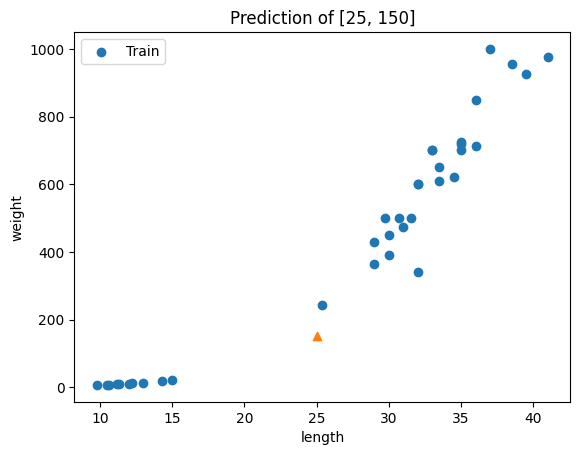

In [ ]:
# 잉? 도미가 아니라 빙어로 예측하였다. 이를 산점도로 확인해보자.
plt.scatter(train_input[:,0], train_input[:,1], label = "Train")
plt.scatter(25, 150, marker = "^")
plt.xlabel("length")
plt.ylabel("weight")
plt.title("Prediction of [25, 150]")
plt.legend(loc = "best")
plt.show()

* 왜 이 모델은 왼쪽 아래에 낮게 깔린 빙어 데이터에 더 가깝다고 판단한걸까? 이 샘플의 주변 샘플을 알아보자.
> `.kneighbors(data, return_distance = True)`: 입력한 데이터에 가장 가까운 이웃까지의 거리와 이웃 샘플의 인덱스를 반환

In [ ]:
distances, indexes = kn.kneighbors([[25, 150]])

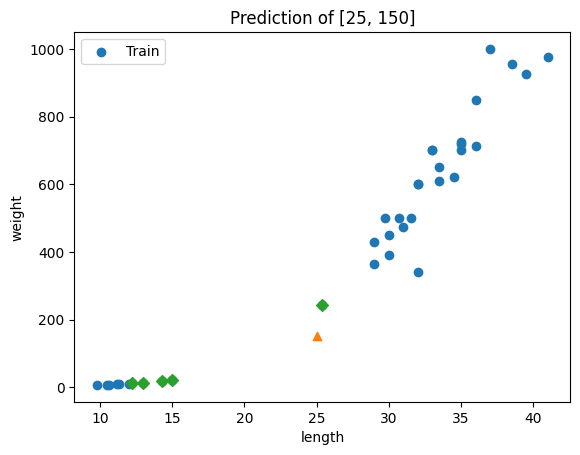

In [ ]:
# 훈련 데이터 중에 [25 ,150]의 이웃 샘플을 따로 구분해 그려보자
plt.scatter(train_input[:,0], train_input[:,1], label = "Train")
plt.scatter(25, 150, marker = "^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker = 'D')
plt.xlabel("length")
plt.ylabel("weight")
plt.title("Prediction of [25, 150]")
plt.legend(loc = "best")
plt.show()

In [ ]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


* 이웃 샘플 5개 중 4개는 빙어다. 하지만 plot으로 보면 도미에 더 가까운 것 같은데? 이번에는 distances 배열을 출력해보자.

In [ ]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## **기준을 맞춰라**
* 거리가 92와 130이라고 하면 그래프상으로 거리의 비율이 이상하다. 어림짐작으로도 92의 거리보다 족히 몇 배는 되어 보인느데 겨우 거리가 130이다.  
==> **그래프의 x축의 범위는 좁지만 (10 ~ 40)이고, y축의 범위는 넓다 (0~1000). 따라서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산된다.**

* x축의 범위를 동일하게 0 ~ 1,000으로 맞추어 보자

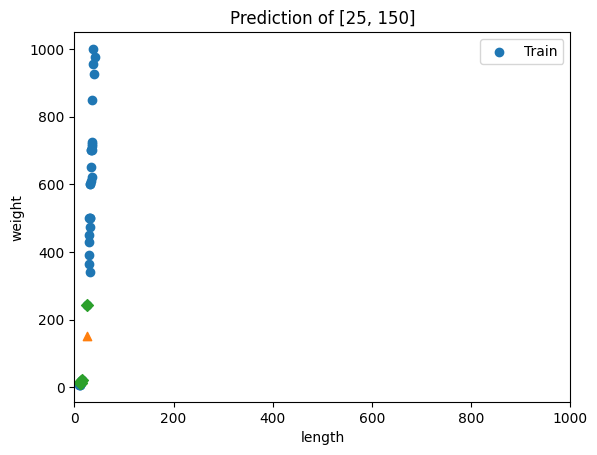

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1], label = "Train")
plt.scatter(25, 150, marker = "^")
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker = 'D')
plt.xlabel("length")
plt.ylabel("weight")
plt.xlim((0,1000))
plt.title("Prediction of [25, 150]")
plt.legend(loc = "best")
plt.show()

* 생선의 길이는 가장 가까운 이웃을 찾는데 크게 영향을 미치지 못한다. 오로지 생선의 무게만 고려 대상이 됨  
==>  데이터를 표현하는 기준이 다르면 알고리즘(특히 거리 기반 알고리즘)이 올바르게 예측할 수 없다.
  * **스케일(scale)**: 두 특성의 값이 놓인 범위.
  * **데이터 전처리(data preprocessing)**: 특성값을 일정한 기준으로 맞춰주는 것
  * **분산(Variance)**: 데이터가 분산된 정도  
\begin{align}
{variance = {\sum{(data - mean)^2}\over{n}}}
\end{align}
  
\begin{align}
{std = {\sqrt{variance}}}
\end{align}
  * **표준 점수(standard data)**: 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타내는 점수  
\begin{align}
{Z = {{data - mean} \over{std}}}
\end{align}

In [ ]:
# 평균 계산하기 (각 특성(열) 별로, axis = 0)
mean = np.mean(train_input, axis = 0)
# 표준편차 계산하기
std = np.std(train_input, axis = 0)
print(mean,std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


* **브로드 캐스팅(broad casting)**: 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능

In [ ]:
# train_input의 모든 행에서 mean에 있는 두 평균값을 빼준 후 std에 있는 두 표준편차를 다시 모든 행에 적용한다.
train_scaled = (train_input - mean) / std

## **전처리 데이터로 모델 훈련하기**
* 새로운 값 또한 scaling하여 입력해주어야 한다.

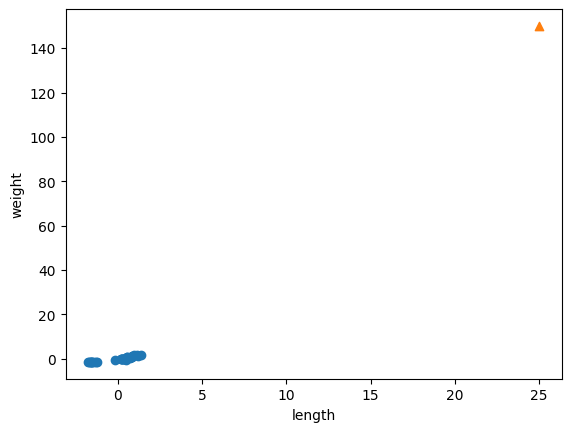

In [ ]:
# 새로운 값을 동일한 비율로 변환해주지 않았을 때
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 중요한 것은 새로운 값을 scaling할 때 **훈련 세트의 mean과 std**를 이용해서 변환해야 한다는 점!

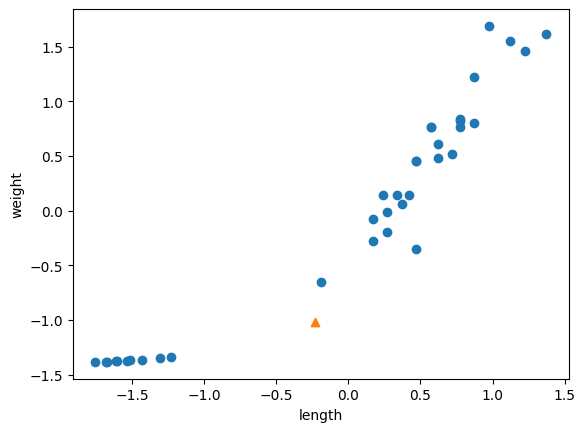

In [ ]:
new = ([25, 125] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# scaled data를 이용해 다시 모델 훈련하기
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

* 마찬가지로 테스트 세트도 **훈련 세트의 평균과 표준편차**로 변환해야 한다. 그렇지 않으면 특성값이 엉뚱하게 변환될 것이고, 훈련 세트로 훈련한 모델이 제대로 동작하지 않을 것입니다.

In [ ]:
test_scaled  = (test_input - mean)/std

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


* 드디어 새로운 데이터를 도미로 예측했다. 이제 산점도를 그려 확인해보자. 특성을 표준점수로 바꾸었기 때문에 k-최근접 이웃 알고리즘이 올바르게 거리를 측정했을 것이다.


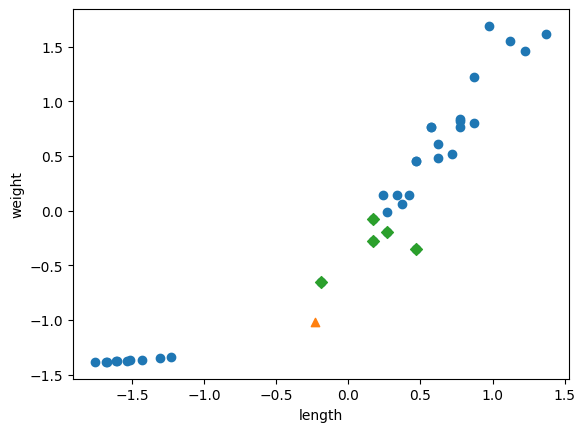

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes, 1], marker = "D")
plt.xlabel('length')
plt.ylabel("weight")
plt.show()